In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import copy
import os

import sys
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from helper import df_to_latex, fig_path, set_figsize, tab_path

# Import code from src
sys.path.insert(0, '../src/')
import vmc 


# Set plot style
sns.set(context="paper", style='darkgrid', rc={"axes.facecolor": "0.96"})

fontsize = "large"

params = {"font.family": "serif",
          "font.sans-serif": ["Computer Modern"],
          "axes.labelsize": fontsize,
          "legend.fontsize": fontsize,
          "xtick.labelsize": fontsize,
          "ytick.labelsize": fontsize,
          "legend.handlelength": 2
          }


plt.rcParams.update(params)
plt.rc('text', usetex=True)

"""
# Set plot style
sns.set(context="paper", style='darkgrid', rc={"axes.facecolor": "0.96"})

# Set fontsizes in figures
fontsize = 10
tex_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern"],
    "axes.labelsize": fontsize,
    "font.size": fontsize,
    "legend.fontsize": fontsize,
    "xtick.labelsize": fontsize-1,
    "ytick.labelsize": fontsize-1,
    'legend.handlelength': 2
}

plt.rcParams.update(tex_fonts)
"""
# Set figure size
width = 410 #360
figsize = set_figsize(width, fraction=1)

In [3]:
def exact_energy(N, dim, omega):
    return (omega * dim * N) / 2

def safe_initial_positions_no_interactions(wavefunction, alpha, N, dim, seed=None):
    rng = np.random.default_rng(seed=seed)
    positions = rng.random(size=(N, dim))

    # safe initialization
    wf2 = wavefunction.pdf(positions, alpha)
    while np.sum(wf2) <= 1e-14:
        positions *= 0.5
        wf2 = wavefunction.pdf(positions, alpha)

    return positions

def safe_initial_positions_w_interactions(wavefunction, alpha, N, dim, seed=None): 
    rng = np.random.default_rng(seed=seed)
    positions = rng.random(size=(N, dim))
    
    # safe initialization
    wf2 = wavefunction.pdf(positions, alpha)
    while np.sum(wf2) <= 1e-14: 
        positions *= 2.0
        wf2 = wavefunction.pdf(positions, alpha)
        
    return positions

def interact_initial_positions(wf, alpha, N, dim, a=0.00433):

    rng = np.random.default_rng()

    def corr_factor(r1, r2):
        rij = np.linalg.norm(r1 - r2)
        if rij <= a:
            return 0.
        else:
            return 1 - (a / rij)

    scale = 2.
    r = np.random.randn(N, dim) * scale
    #r = rng.random(size=(N, dim))

    rerun = True
    while rerun:
        rerun = False
        for i in range(N):
            for j in range(i + 1, N):
                corr = corr_factor(r[i, :], r[j, :])
                if corr == 0.:
                    print("corr=0 encountered")
                    rerun = True
                    r[i, :] = np.random.randn() * scale
                    r[j, :] = np.random.randn() * scale
        scale *= 1.5

    return r, scale

## Grid search $\alpha$ with interactions

In [16]:
N = 10
dim = 3
omega = 1.

# Exact energy without interactions
NI_exact_energy_10 = exact_energy(N, dim, omega)
# Instantiate wave function
wf = vmc.ASHOIB(N, dim, omega)

# Instantiate sampler
sampler = vmc.samplers.Metropolis(wf)

# Config
nsamples = int(2**16)
alpha_step = 0.1
alphas = np.arange(0.1, 1 + alpha_step, alpha_step)

results = []

start = time.time()
for i, alpha in enumerate(alphas):
    initial_positions, scale = interact_initial_positions(wf,
                                                          alpha,
                                                          N,
                                                          dim)
    result = sampler.sample(nsamples,
                            initial_positions,
                            alpha,
                            nchains=2,
                            scale=1.0,
                            seed=None,
                            warm=True,
                            warmup_iter=5000,
                            tune=True,
                            tune_iter=10000,
                            tune_interval=250,
                            tol_tune=1e-7,
                            optimize=False
                           )
    results.append(result)

end = time.time()
print("Sampler elapsed time:", end - start)

Warm done
Warm done
Tune done
Tune done
Warm after tune done
Sampling energy
Warm after tune done
Sampling energy
Warm done
Warm done
Tune done
Tune done
Warm after tune done
Sampling energy
Warm after tune done
Sampling energy
Warm done
Warm done
Tune done
Tune done
Warm after tune done
Sampling energy
Warm after tune done
Sampling energy
Warm done
Warm done
Tune done
Tune done
Warm after tune done
Sampling energy
Warm after tune done
Sampling energy
Warm done
Warm done
Tune done
Tune done
Warm after tune done
Sampling energy
Warm after tune done
Sampling energy
Warm done
Warm done
Tune done
Tune done
Warm after tune done
Sampling energy
Warm after tune done
Sampling energy
Warm done
Warm done
Tune done
Tune done
Warm after tune done
Sampling energy
Warm after tune done
Sampling energy
Warm done
Warm doneTune done

Tune done
Warm after tune done
Sampling energy
Warm after tune done
Sampling energy
Warm done
Warm done
Tune done
Tune done
Warm after tune done
Sampling energy
Warm after 

Process ForkPoolWorker-2:
Process ForkPoolWorker-1:
Traceback (most recent call last):
  File "/home/jeb/.local/lib/python3.8/site-packages/multiprocess/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/jeb/.local/lib/python3.8/site-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/jeb/.local/lib/python3.8/site-packages/multiprocess/process.py", line 315, in _bootstrap
    self.run()
  File "/home/jeb/.local/lib/python3.8/site-packages/multiprocess/pool.py", line 114, in worker
    task = get()
  File "/home/jeb/.local/lib/python3.8/site-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/jeb/.local/lib/python3.8/site-packages/multiprocess/queues.py", line 359, in get
    res = self._reader.recv_bytes()
  File "/home/jeb/.local/lib/python3.8/site-packages/multiprocess/pool.py", line 114, in worker
    task = get()
 

In [25]:
df_N10 = pd.concat(results, ignore_index=True)
mod_df_10 = df_N10
#mod_df_10["energy"] = mod_df_10["energy"]/10.0
energies = np.zeros(10)
errors = np.zeros(10)
for i, alpha in enumerate(alphas): 
    energies_alpha = mod_df_10["energy"][mod_df_10["alpha"]==alpha]
    mean_energy = np.mean(energies_alpha)
    print(mean_energy)
    energies[i] = mean_energy
    errors[i] = np.std(energies_alpha)
print(energies)
print(errors)
df_N10

39.52756775532383
22.012019770154613
17.28769524232331
15.63773157377712
15.229635424705865
15.737949572774731
16.39822478799001
17.588576295915175
17.9033104368301
19.542138232594567
[39.52756776 22.01201977 17.28769524 15.63773157 15.22963542 15.73794957
 16.39822479 17.5885763  17.90331044 19.54213823]
[0.21927063 0.0329716  0.27634474 0.04939383 0.04705328 0.12123861
 0.34870016 0.0798778  0.6626841  0.30069068]


,nparticles,dim,alpha,energy,standard_error,accept_rate
0,10,3,0.1,39.746838,1.427749,0.54116
1,10,3,0.1,39.308297,1.118904,0.48180
2,10,3,0.2,22.044991,0.692033,0.42364
3,10,3,0.2,21.979048,0.584729,0.47520
4,10,3,0.3,17.011350,0.210832,0.36796
5,10,3,0.3,17.564040,0.558646,0.68632
6,10,3,0.4,15.588338,0.195732,0.61700
7,10,3,0.4,15.687125,0.277845,0.77244
8,10,3,0.5,15.182582,0.001638,0.33164
9,10,3,0.5,15.276689,0.003628,0.74080


In [22]:
mod_df_10 = df_N10
#mod_df_10["energy"] = mod_df_10["energy"]/10.0
energies = np.zeros(10)
errors = np.zeros(10)
for i, alpha in enumerate(alphas): 
    energies_alpha = mod_df_10[mod_df_10["alpha"]==alpha]
    mean_energy = np.mean(energies_alpha)
    energies[i] = mean_energy
    errors[i] = np.std(energies_alpha)

#lower_bound = mod_df_10["energy"] - 1*mod_df_10["standard_error"]/10.0
#upper_bound = mod_df_10["energy"] + 1*mod_df_10["standard_error"]/10.0
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True, dpi=200)
sns.lineplot(data=mod_df_10, x="alpha", y="energy", ax=ax, label="VMC")
ax.fill_between(mod_df_10["alpha"], lower_bound, upper_bound, facecolor='yellow', alpha=0.5,
                label=r'1 $\sigma$ range')
ax.axhline(NI_exact_energy_10/10.0, ls='--', color='r', label='Exact')
ax.set(xlabel=r'$\alpha$', ylabel=r'$\frac{E}{N}$')
ax.legend()
plt.show()

fig.savefig(fig_path("grid_search_analytical_w_interactions_N_10.pdf"), bbox_inches='tight')

ValueError: setting an array element with a sequence.

In [5]:
N = 50
dim = 3
omega = 1.

# Exact energy without interactions
NI_exact_energy_50 = exact_energy(N, dim, omega)
# Instantiate wave function
wf = vmc.ASHOIB(N, dim, omega)

# Instantiate sampler
sampler = vmc.samplers.Metropolis(wf)

# Config
nsamples = int(2**16)
alpha_step = 0.1
alphas = np.arange(0.1, 1 + alpha_step, alpha_step)

results_N50 = []

start = time.time()
for i, alpha in enumerate(alphas):
    initial_positions, scale = interact_initial_positions(wf,
                                                          alpha,
                                                          N,
                                                          dim)
    result = sampler.sample(nsamples,
                            initial_positions,
                            alpha,
                            nchains=1,
                            scale=1.0,
                            seed=None,
                            warm=True,
                            warmup_iter=10000,
                            tune=True,
                            tune_iter=30000,
                            tune_interval=1000,
                            tol_tune=1e-5,
                            optimize=False
                           )
    results_N50.append(result)

end = time.time()
print("Sampler elapsed time:", end - start)

Warm done
Tune done
Warm after tune done
Sampling energy
Warm done
Tune done
Warm after tune done
Sampling energy
Warm done
Tune done
Warm after tune done
Sampling energy
Warm done
Tune done
Warm after tune done
Sampling energy
Warm done
Tune done
Warm after tune done
Sampling energy
Warm done
Tune done
Warm after tune done
Sampling energy
Warm done
Tune done
Warm after tune done
Sampling energy
Warm done
Tune done
Warm after tune done
Sampling energy
Warm done
Tune done
Warm after tune done
Sampling energy
Warm done
Tune done
Warm after tune done
Sampling energy
Sampler elapsed time: 1441.9694294929504


In [6]:
df_N50 = pd.concat(results_N50, ignore_index=True)
df_N50

,nparticles,dim,alpha,energy,standard_error,accept_rate
0,50,3,0.1,178.482665,5.639624,0.612854
1,50,3,0.2,124.366894,3.957558,0.591949
2,50,3,0.3,88.423670,1.029366,0.412415
3,50,3,0.4,81.581622,0.614678,0.501999
4,50,3,0.5,80.283765,0.014941,0.544037
5,50,3,0.6,82.626416,0.356797,0.469193
6,50,3,0.7,83.668987,1.104545,0.407532
7,50,3,0.8,86.352154,1.969527,0.509842
8,50,3,0.9,95.603264,1.486853,0.513000
9,50,3,1.0,101.726578,1.776397,0.483322


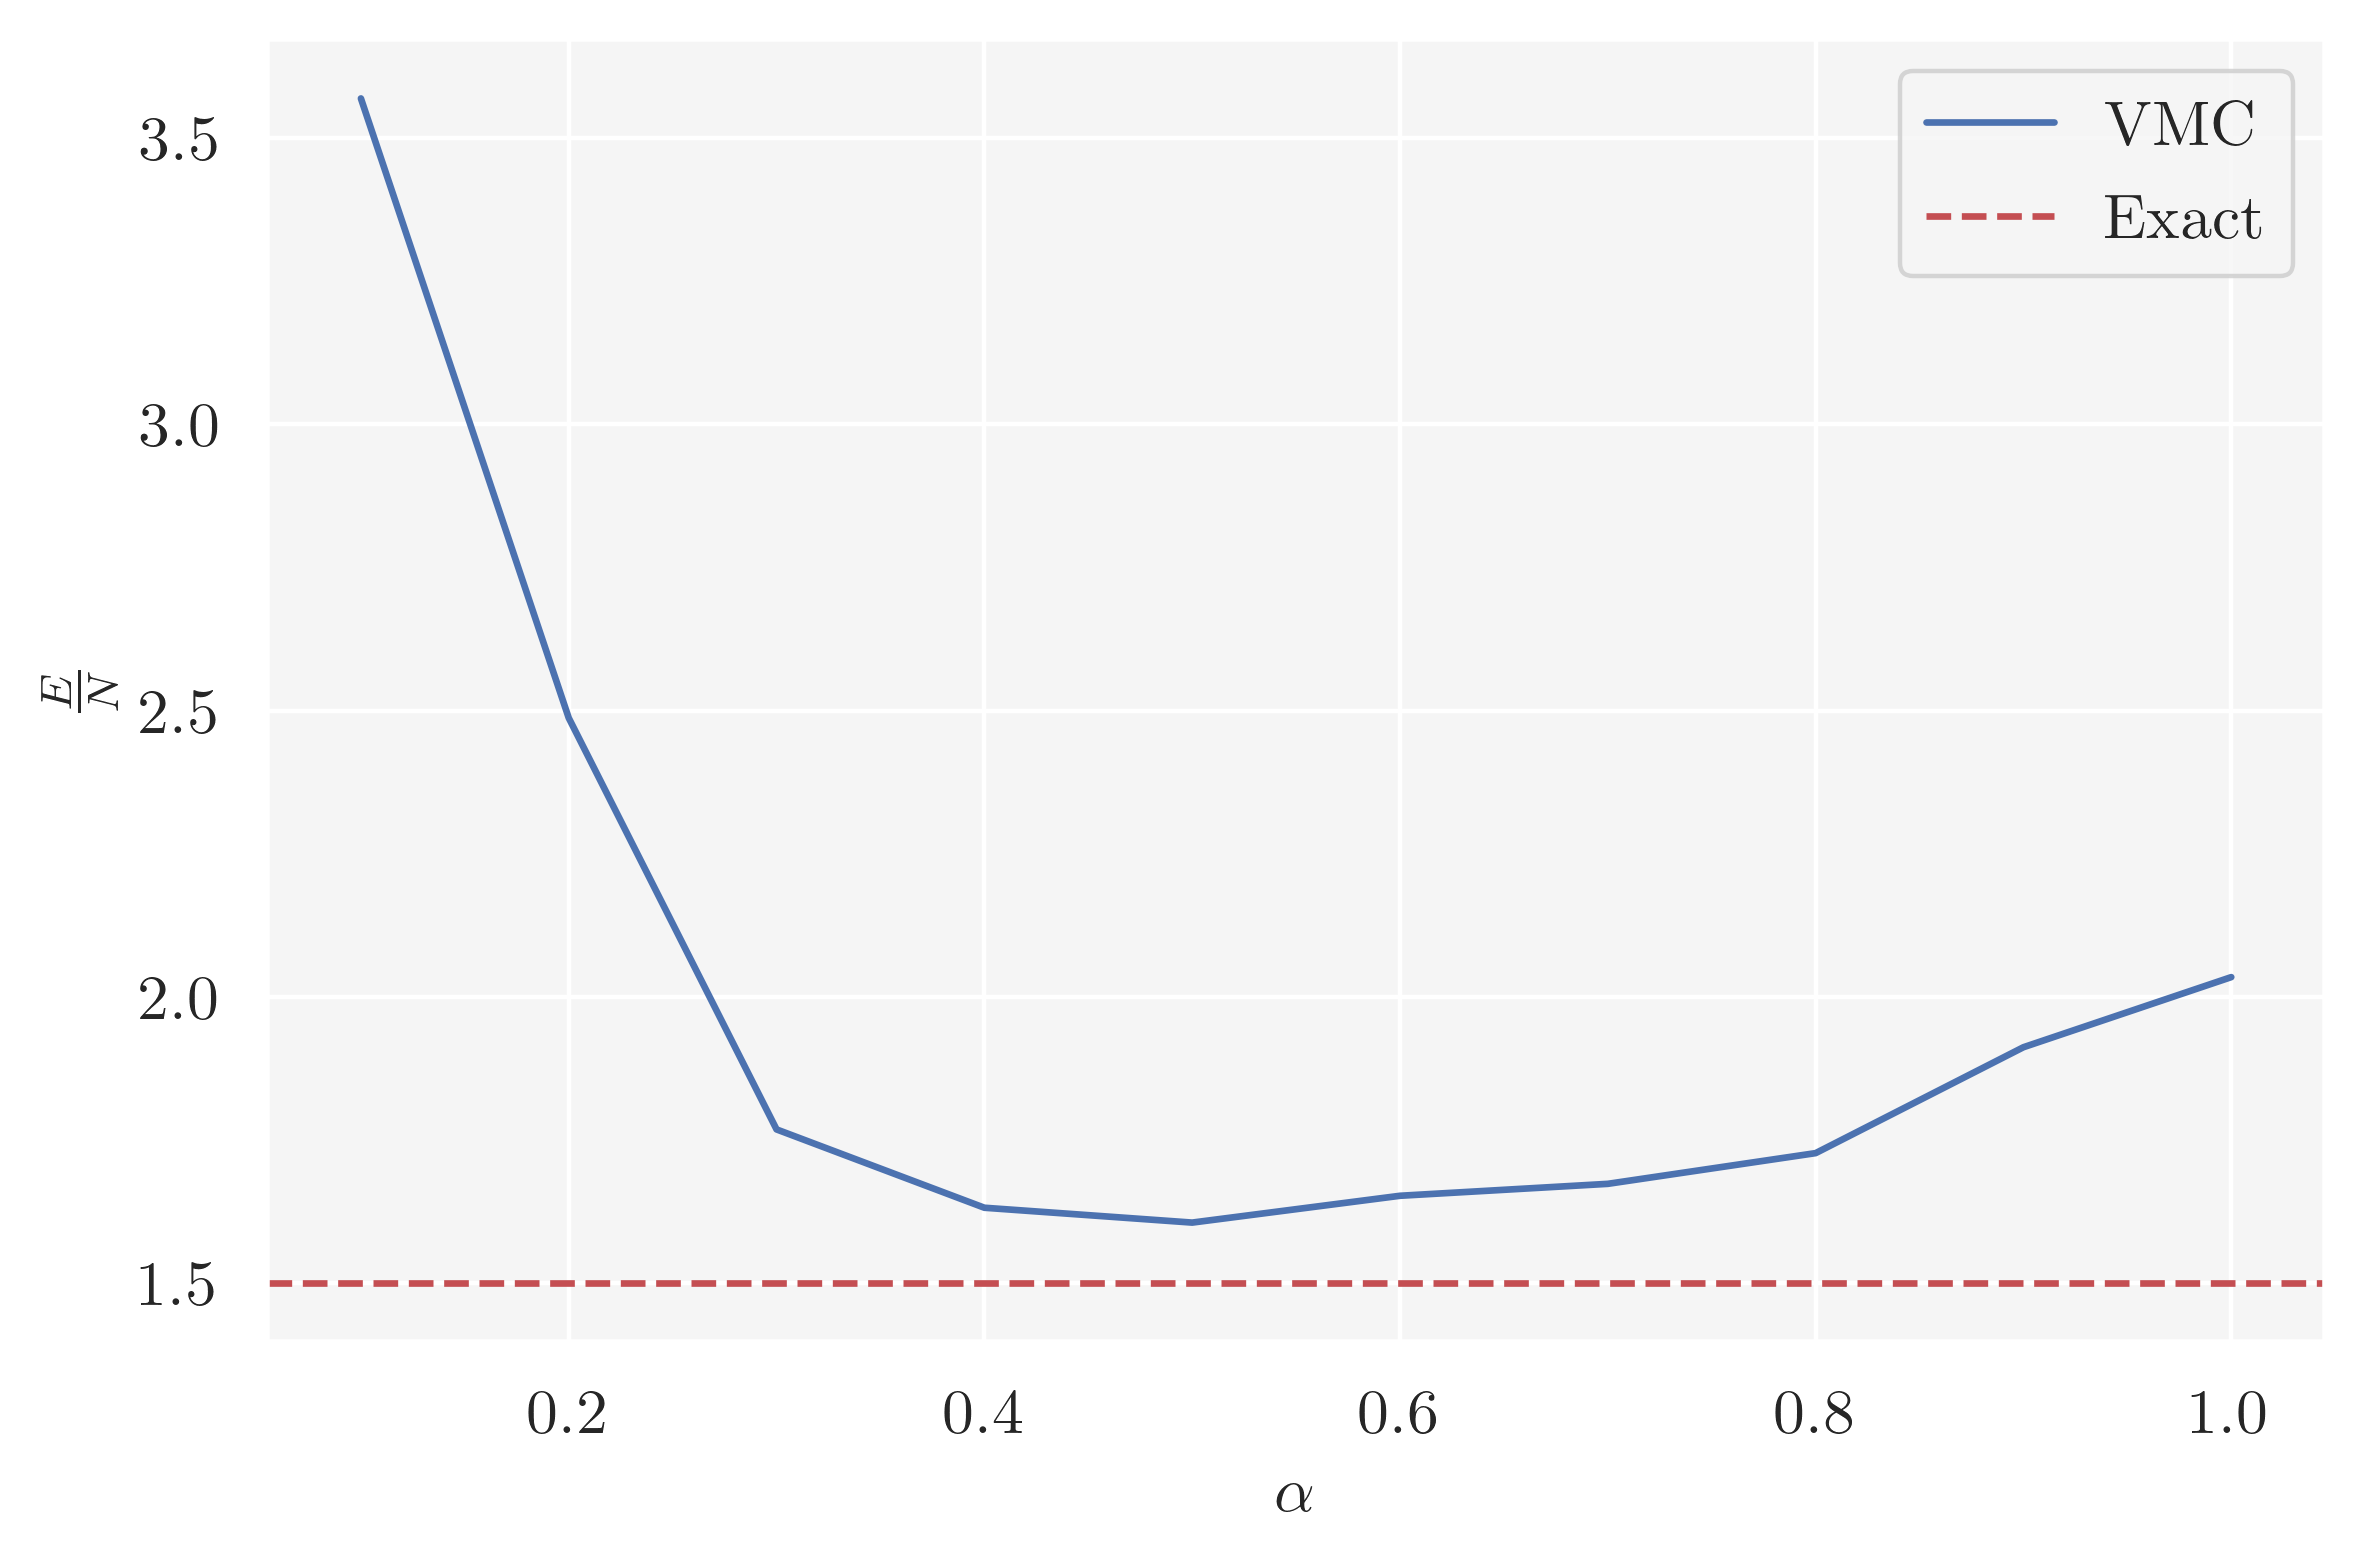

In [7]:
mod_df_50 = df_N50
mod_df_50["energy"] = mod_df_50["energy"]/50.0
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True, dpi=200)
sns.lineplot(data=mod_df_50, x="alpha", y="energy", ax=ax, label="VMC")
ax.axhline(NI_exact_energy_50/50.0, ls='--', color='r', label='Exact')
ax.set(xlabel=r'$\alpha$', ylabel=r'$\frac{E}{N}$')
ax.legend()
plt.show()

fig.savefig(fig_path("grid_search_analytical_w_interactions_N_50.pdf"), bbox_inches='tight')

In [8]:
N = 100
dim = 3
omega = 1.

# Exact energy without interactions
NI_exact_energy_100 = exact_energy(N, dim, omega)
# Instantiate wave function
wf = vmc.ASHOIB(N, dim, omega)

# Instantiate sampler
sampler = vmc.samplers.Metropolis(wf)

# Config
nsamples = int(2**17)
alpha_step = 0.1
alphas = np.arange(0.1, 1 + alpha_step, alpha_step)

results_N100 = []

start = time.time()
for i, alpha in enumerate(alphas):
    initial_positions, scale = interact_initial_positions(wf,
                                                          alpha,
                                                          N,
                                                          dim)
    result = sampler.sample(nsamples,
                            initial_positions,
                            alpha,
                            nchains=1,
                            scale=1.0,
                            seed=None,
                            warm=True,
                            warmup_iter=15000,
                            tune=True,
                            tune_iter=30000,
                            tune_interval=1000,
                            tol_tune=1e-5,
                            optimize=False
                           )
    results_N100.append(result)

end = time.time()
print("Sampler elapsed time:", end - start)

Warm done
Tune done
Warm after tune done
Sampling energy
Warm done
Tune done
Warm after tune done
Sampling energy
Warm done
Tune done
Warm after tune done
Sampling energy
Warm done
Tune done
Warm after tune done
Sampling energy
Warm done
Tune done
Warm after tune done
Sampling energy
Warm done
Tune done
Warm after tune done
Sampling energy
Warm done
Tune done
Warm after tune done
Sampling energy
Warm done
Tune done
Warm after tune done
Sampling energy
Warm done
Tune done
Warm after tune done
Sampling energy
Warm done
Tune done
Warm after tune done
Sampling energy
Sampler elapsed time: 10645.369837999344


In [9]:
df_N100 = pd.concat(results_N100, ignore_index=True)
df_N100

,nparticles,dim,alpha,energy,standard_error,accept_rate
0,100,3,0.1,405.672722,16.614325,0.492805
1,100,3,0.2,238.759812,5.647515,0.507965
2,100,3,0.3,186.371711,3.185576,0.628746
3,100,3,0.4,170.743333,1.394043,0.520569
4,100,3,0.5,168.484796,0.035393,0.491508
5,100,3,0.6,171.875197,0.946640,0.511063
6,100,3,0.7,179.901925,1.554708,0.480629
7,100,3,0.8,188.395070,2.142602,0.453255
8,100,3,0.9,198.663234,5.071437,0.578362
9,100,3,1.0,216.972159,2.608463,0.410149


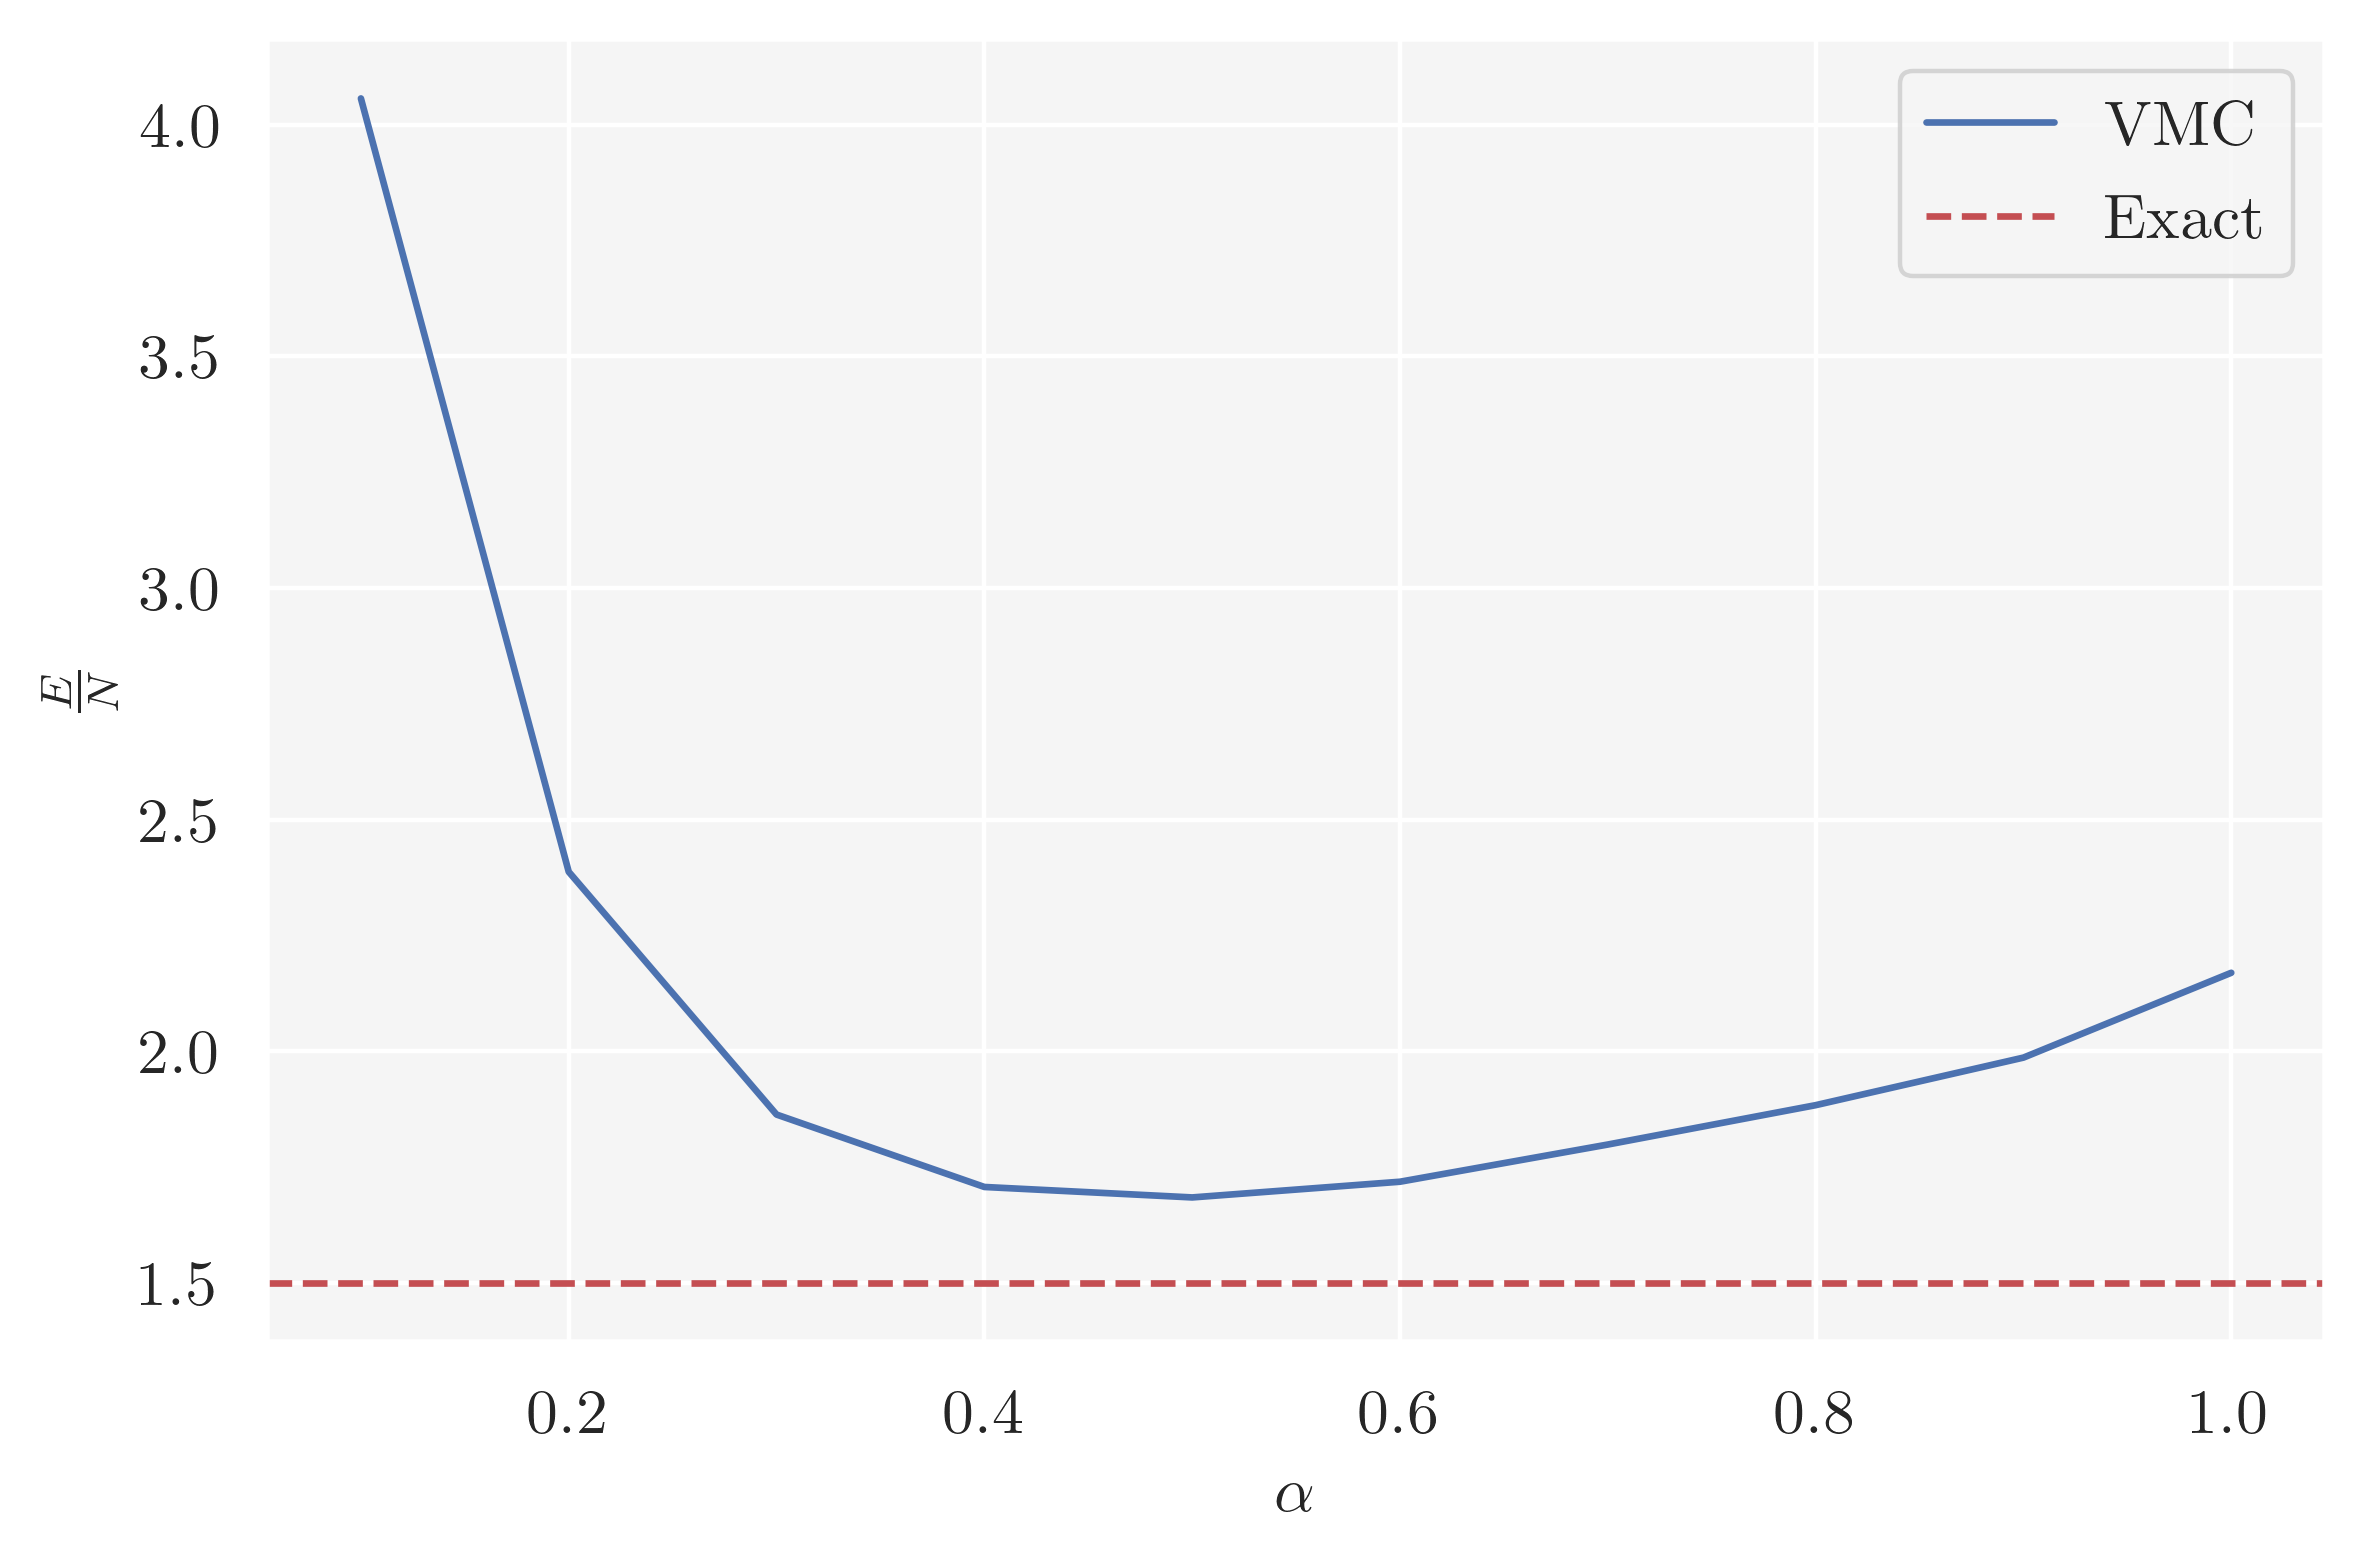

In [10]:
mod_df_100 = df_N100
mod_df_100["energy"] = mod_df_100["energy"]/100.0
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True, dpi=200)
sns.lineplot(data=mod_df_100, x="alpha", y="energy", ax=ax, label="VMC")
ax.axhline(NI_exact_energy_100/100.0, ls='--', color='r', label='Exact')
ax.set(xlabel=r'$\alpha$', ylabel=r'$\frac{E}{N}$')
ax.legend()
plt.show()

fig.savefig(fig_path("grid_search_analytical_w_interactions_N_100.pdf"), bbox_inches='tight')

NameError: name 'mod_df_10' is not defined

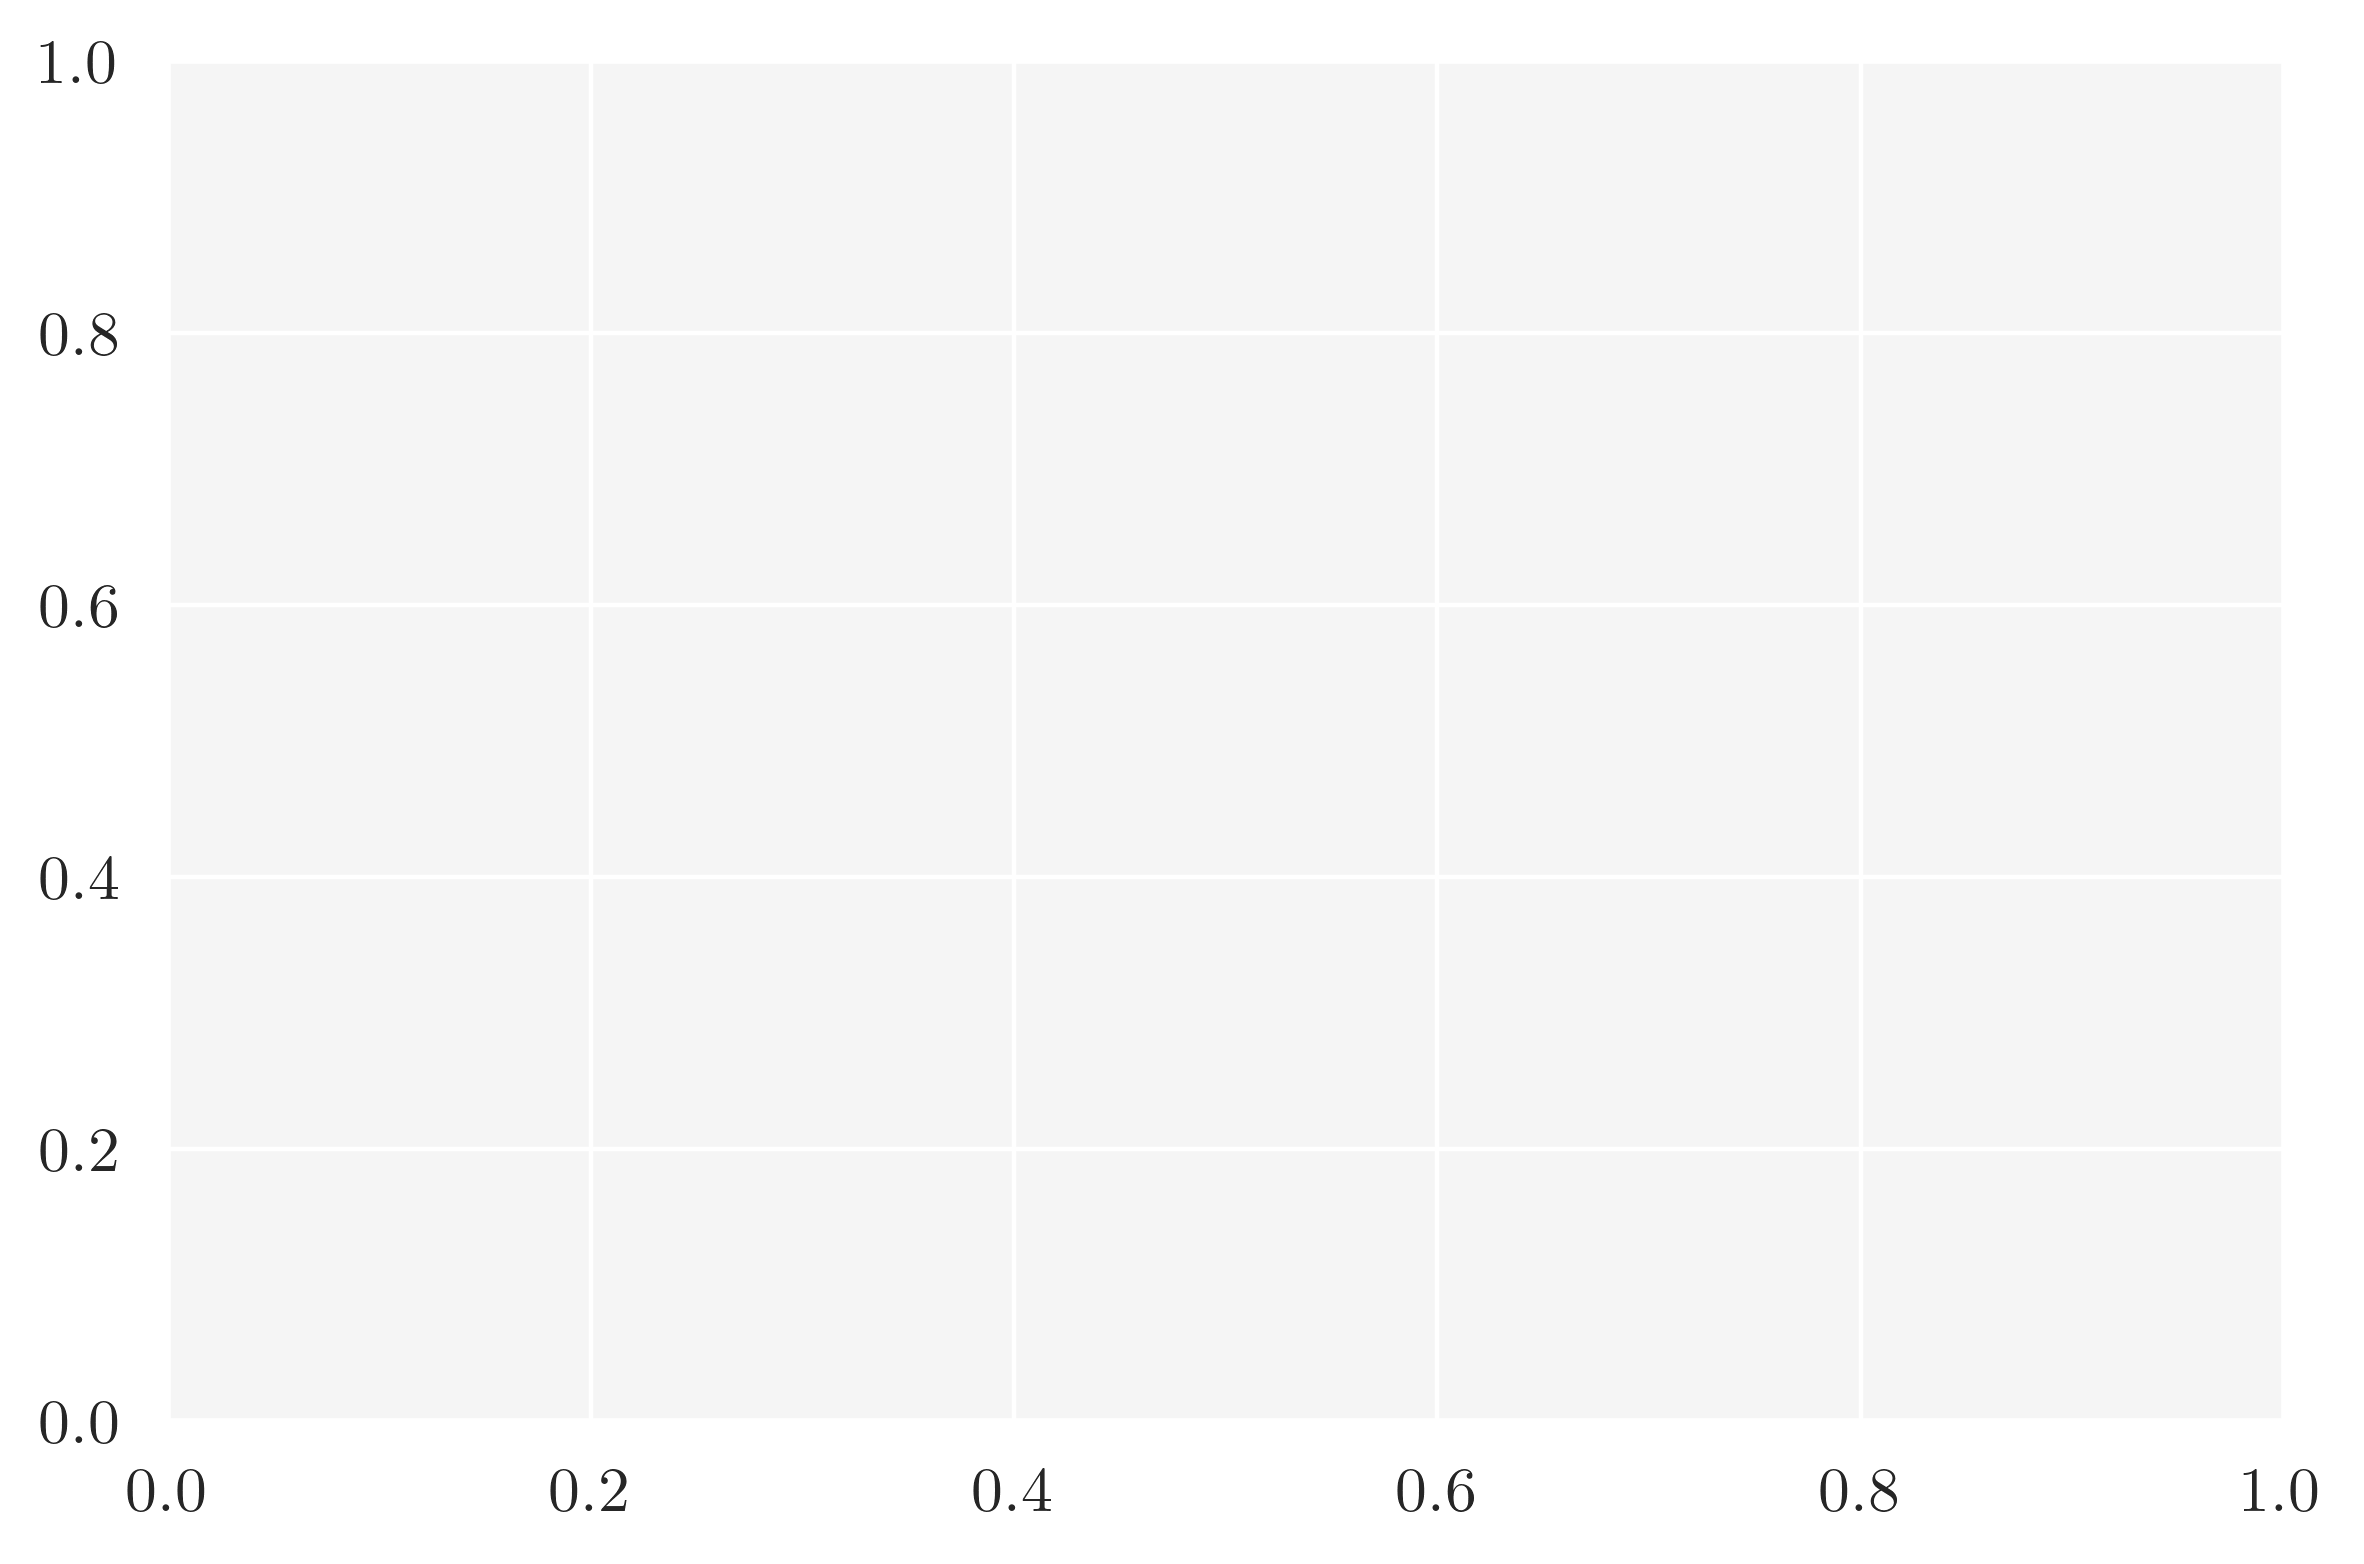

In [11]:
fig, ax = plt.subplots(figsize=(6,4), tight_layout=True, dpi=200)
sns.lineplot(data=mod_df_10, x="alpha", y="energy", ax=ax, label="N=10")
sns.lineplot(data=mod_df_50, x="alpha", y="energy", ax=ax, label="N=50")
sns.lineplot(data=mod_df_100, x="alpha", y="energy", ax=ax, label="N=100")
ax.axhline(NI_exact_energy_100/100.0, ls='--', color='r', label='Exact')
ax.set(xlabel=r'$\alpha$', ylabel=r'$\frac{E}{N}$')
ax.legend()
plt.show()

fig.savefig(fig_path("grid_search_analytical_w_interactions_all_N.pdf"), bbox_inches='tight')